In [192]:
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import os
import shutil
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

In [193]:
data_dir = './COVID-19_Radiography_Dataset'
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']
data = []

for category in categories:
    temp = category +"/images/"
    folder = os.path.join(data_dir, temp)
    label = categories.index(category)
    for file in os.listdir(folder):
        if file.endswith('.png'):
            data.append((os.path.join(folder, file), label))

df = pd.DataFrame(data, columns=['file_path', 'label'])
df = df.sample(frac=1).reset_index(drop=True) # for shuffling the dataset

In [194]:
data

[('./COVID-19_Radiography_Dataset/COVID/images/COVID-1.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1175.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1613.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-948.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-790.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-3004.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-3010.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1607.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-784.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1161.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-2468.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1149.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-2440.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-3038.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-2

In [195]:
df

,file_path,label
0,./COVID-19_Radiography_Dataset/Lung_Opacity/im...,1
1,./COVID-19_Radiography_Dataset/Normal/images/N...,2
2,./COVID-19_Radiography_Dataset/COVID/images/CO...,0
3,./COVID-19_Radiography_Dataset/COVID/images/CO...,0
4,./COVID-19_Radiography_Dataset/COVID/images/CO...,0
...,...,...
21160,./COVID-19_Radiography_Dataset/COVID/images/CO...,0
21161,./COVID-19_Radiography_Dataset/Normal/images/N...,2
21162,./COVID-19_Radiography_Dataset/Normal/images/N...,2
21163,./COVID-19_Radiography_Dataset/COVID/images/CO...,0


image dimensions: (299, 299)


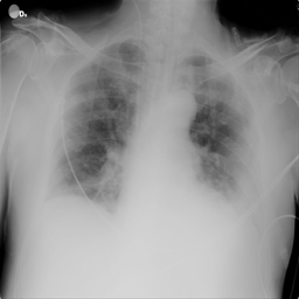

In [196]:
covid_image_path = './COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", covid_image.size)
covid_image

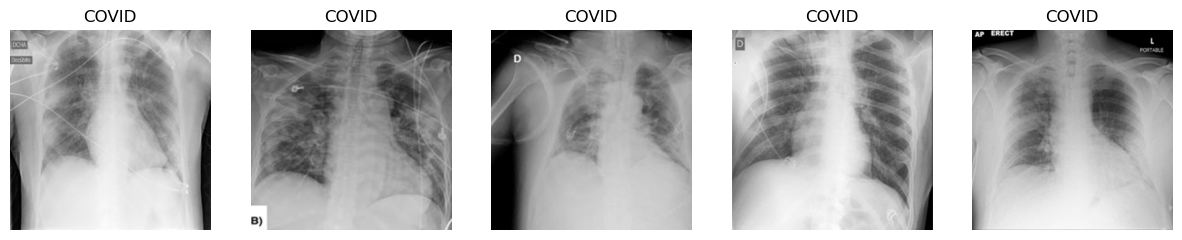

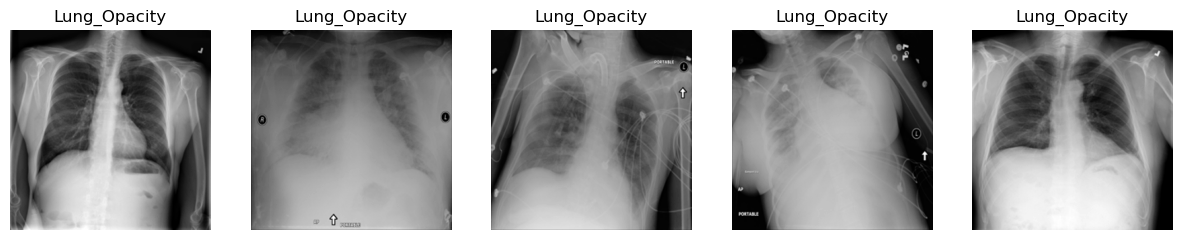

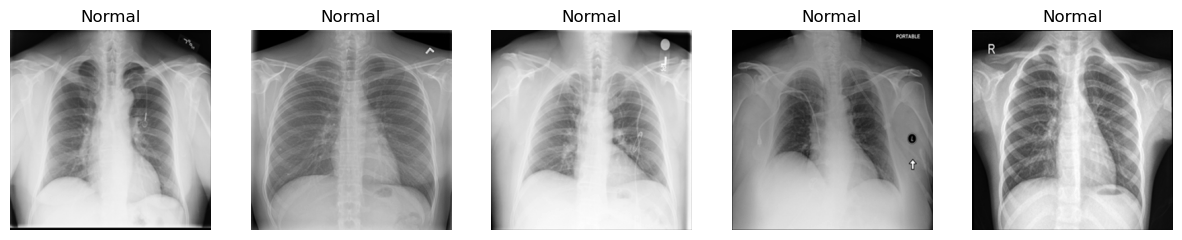

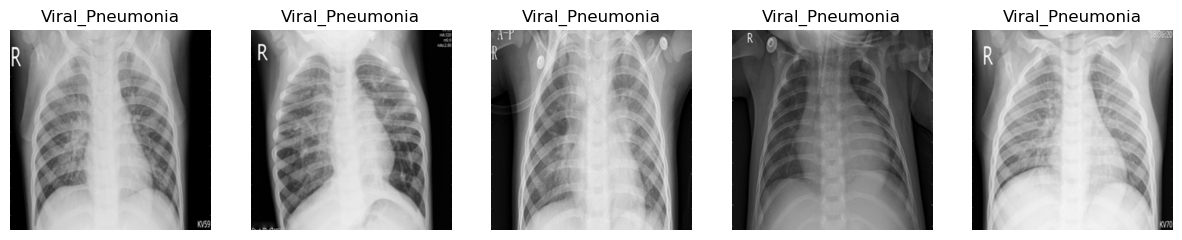

In [197]:
def plot_samples(df, category, n=5):
    samples = df[df['label'] == categories.index(category)]
    n = min(n, len(samples))
    samples = samples.sample(n)
    plt.figure(figsize=(15, 5))
    for i, (file_path, label) in enumerate(samples.values):
        plt.subplot(1, n, i+1)
        img = plt.imread(file_path)
        plt.imshow(img, cmap='gray')
        plt.title(f'{category}')
        plt.axis('off')
    plt.show()

for category in categories:
    plot_samples(df, category)

In [198]:
counts = df['label'].value_counts().sort_index()
counts.index = [categories[i] for i in counts.index]

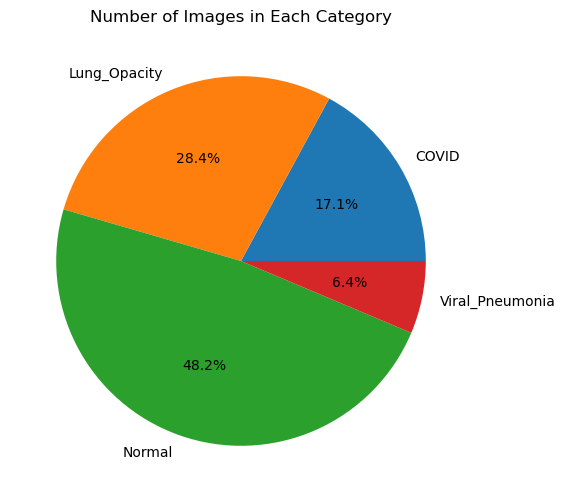

In [199]:
plt.figure(figsize=(10, 6))
counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of Images in Each Category')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

In [200]:
categories

['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

In [201]:
df['label'].value_counts()

2    10192
1     6012
0     3616
3     1345
Name: label, dtype: int64

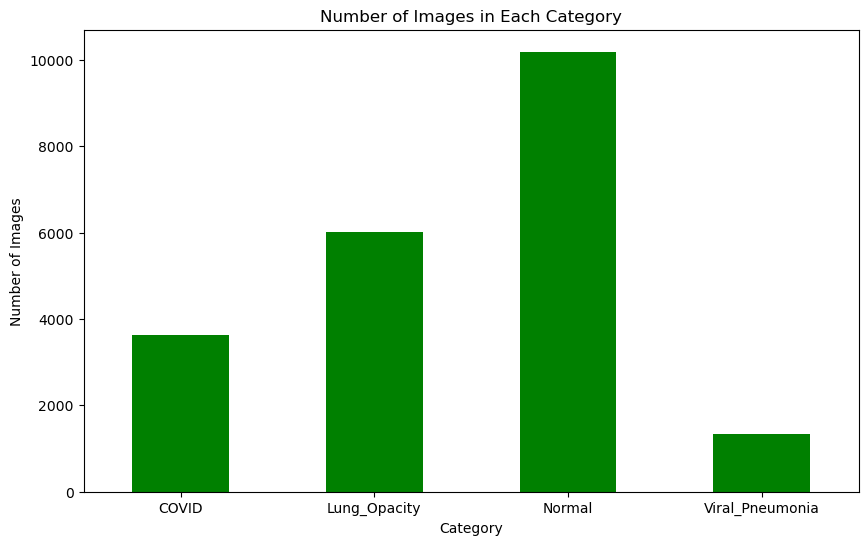

In [202]:
plt.figure(figsize=(10, 6))
counts.plot(kind='bar',color = 'green')
plt.title('Number of Images in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.show()

In [203]:
categories

['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

In [204]:
# Define the path to the main dataset folder
dataset_folder = "COVID-19_Radiography_Dataset"

# Define the subdirectories
subdirectories = ["COVID", "Lung_Opacity", "Normal", "Viral_Pneumonia"]

# Create train, test, and validate directories
train_dir = "train"
test_dir = "test"
#validate_dir = "validate"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
#os.makedirs(validate_dir, exist_ok=True)

# Split the data into train, test, and validate sets
for subdir in subdirectories:
    subdir_path = os.path.join(dataset_folder, subdir, "images")
    images = os.listdir(subdir_path)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    #train_images, validate_images = train_test_split(train_images, test_size=0.25, random_state=42)

    # Create subdirectories in train, test, and validate
    train_subdir = os.path.join(train_dir, subdir)
    test_subdir = os.path.join(test_dir, subdir)
    #validate_subdir = os.path.join(validate_dir, subdir)
    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)
    #os.makedirs(validate_subdir, exist_ok=True)

    # Move images to respective directories
    for image in train_images:
        src = os.path.join(subdir_path, image)
        dst = os.path.join(train_subdir, image)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(subdir_path, image)
        dst = os.path.join(test_subdir, image)
        shutil.copy(src, dst)

#     for image in validate_images:
#         src = os.path.join(subdir_path, image)
#         dst = os.path.join(validate_subdir, image)
#         shutil.copy(src, dst)

print("Dataset split into train, test, and validate sets successfully.")

Dataset split into train, test, and validate sets successfully.


In [205]:
#Taking unequal number of images from each of the classes for training.

main_path = "./"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_COVID = glob.glob(train_path+"/COVID/*.png")
train_Lung_Opacity = glob.glob(train_path+"/Lung_Opacity/*.png")
train_Normal = glob.glob(train_path+"/Normal/*.png")
train_Viral_Pneumonia = glob.glob(train_path+"/Viral_Pneumonia/*.png")

test_COVID = glob.glob(test_path+"/COVID/*.png")
test_Lung_Opacity = glob.glob(test_path+"/Lung_Opacity/*.png")
test_Normal = glob.glob(test_path+"/Normal/*.png")
test_Viral_Pneumonia = glob.glob(test_path+"/Viral_Pneumonia/*.png")


train_labels = np.concatenate([np.zeros(len(train_COVID)), np.ones(len(train_Lung_Opacity)),np.ones(len(train_Normal))*2,np.ones(len(train_Viral_Pneumonia))*3])
test_labels = np.concatenate([np.zeros(len(test_COVID)), np.ones(len(test_Lung_Opacity)),np.ones(len(test_Normal))*2,np.ones(len(test_Viral_Pneumonia))*3])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_list = [x for x in train_COVID]
train_list.extend([x for x in train_Lung_Opacity])
train_list.extend([x for x in train_Normal])
train_list.extend([x for x in train_Viral_Pneumonia])

df_train = pd.DataFrame(np.concatenate([['COVID']*len(train_COVID) , ['Lung_Opacity']*len(train_Lung_Opacity),['Normal']*len(train_Normal),['Viral_Pneumonia']*len(train_Viral_Pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_COVID]
test_list.extend([x for x in test_Lung_Opacity])
test_list.extend([x for x in test_Normal])
test_list.extend([x for x in test_Viral_Pneumonia])

df_test = pd.DataFrame(np.concatenate([['COVID']*len(test_COVID) , ['Lung_Opacity']*len(test_Lung_Opacity),['Normal']*len(test_Normal),['Viral_Pneumonia']*len(test_Viral_Pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


In [206]:
df_test

,class,image
0,COVID,./test/COVID/COVID-1.png
1,COVID,./test/COVID/COVID-1607.png
2,COVID,./test/COVID/COVID-2326.png
3,COVID,./test/COVID/COVID-2332.png
4,COVID,./test/COVID/COVID-2497.png
...,...,...
4230,Viral_Pneumonia,./test/Viral_Pneumonia/Viral Pneumonia-18.png
4231,Viral_Pneumonia,./test/Viral_Pneumonia/Viral Pneumonia-225.png
4232,Viral_Pneumonia,./test/Viral_Pneumonia/Viral Pneumonia-557.png
4233,Viral_Pneumonia,./test/Viral_Pneumonia/Viral Pneumonia-219.png


In [207]:
df_train['class'].value_counts()

Normal             8153
Lung_Opacity       4809
COVID              2892
Viral_Pneumonia    1076
Name: class, dtype: int64

In [208]:
df_test['class'].value_counts()

Normal             2039
Lung_Opacity       1203
COVID               724
Viral_Pneumonia     269
Name: class, dtype: int64

In [209]:
from numpy.random import seed
import random
seed(42)
SEED = 42

random.seed(42)
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [210]:
train_df

,class,image
4740,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-5459.png
15817,Normal,./train/Normal/Normal-7534.png
8672,Normal,./train/Normal/Normal-1837.png
16699,Viral_Pneumonia,./train/Viral_Pneumonia/Viral Pneumonia-816.png
9360,Normal,./train/Normal/Normal-9101.png
...,...,...
11112,Normal,./train/Normal/Normal-1306.png
4298,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-5258.png
5533,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-1753.png
4064,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-4812.png


In [211]:
val_df

,class,image
10294,Normal,./train/Normal/Normal-7773.png
7028,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-4305.png
4002,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-2592.png
12357,Normal,./train/Normal/Normal-6289.png
7216,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-4705.png
...,...,...
7929,Normal,./train/Normal/Normal-8018.png
3834,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-2197.png
9541,Normal,./train/Normal/Normal-5921.png
3089,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-4253.png


In [212]:
IMG_SIZE = 224
BATCH = 32
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  rotation_range = 70,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'categorical',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = 1,
                                            shuffle = False)


Found 13544 validated image filenames belonging to 4 classes.
Found 3386 validated image filenames belonging to 4 classes.
Found 4235 validated image filenames belonging to 4 classes.


In [213]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

In [214]:
def get_model():
#This is a model with 5 convolutional blocks
    # Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.1)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.1)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Four
    x = layers.Conv2D(filters=128, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Five
    x = layers.Conv2D(filters=256, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Head
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    # Final Layer (Output)
    output = layers.Dense(4, activation='softmax')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [215]:
keras.backend.clear_session()

model = get_model()
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
#               , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [216]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
423/423 [==============================] - 103s 242ms/step - loss: 1.1549 - accuracy: 0.5619 - val_loss: 1.1364 - val_accuracy: 0.5688 - lr: 0.0010
Epoch 2/50
423/423 [==============================] - 103s 244ms/step - loss: 0.9261 - accuracy: 0.6141 - val_loss: 0.8389 - val_accuracy: 0.6553 - lr: 0.0010
Epoch 3/50
423/423 [==============================] - 105s 247ms/step - loss: 0.8727 - accuracy: 0.6342 - val_loss: 0.9981 - val_accuracy: 0.5886 - lr: 0.0010
Epoch 4/50
424/423 [==============================] - ETA: 0s - loss: 0.8409 - accuracy: 0.6459
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
423/423 [==============================] - 105s 248ms/step - loss: 0.8409 - accuracy: 0.6459 - val_loss: 1.3864 - val_accuracy: 0.2841 - lr: 0.0010
Epoch 5/50
423/423 [==============================] - 104s 246ms/step - loss: 0.7933 - accuracy: 0.6604 - val_loss: 0.7873 - val_accuracy: 0.6846 - lr: 2.0000e-04
Epoch 6/50
423/423 [===================

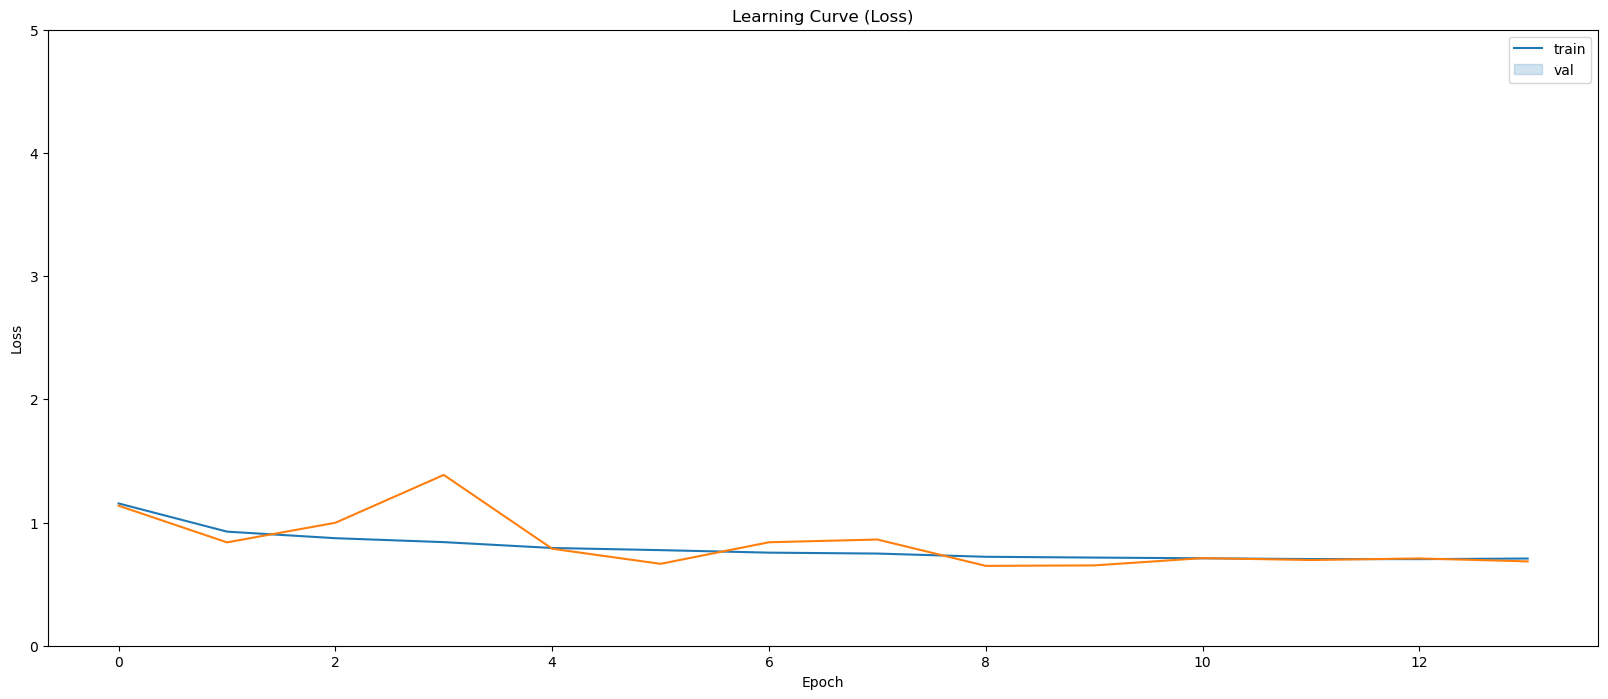

In [225]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 5)
ax.legend(['train', 'val'], loc='best')
plt.show()

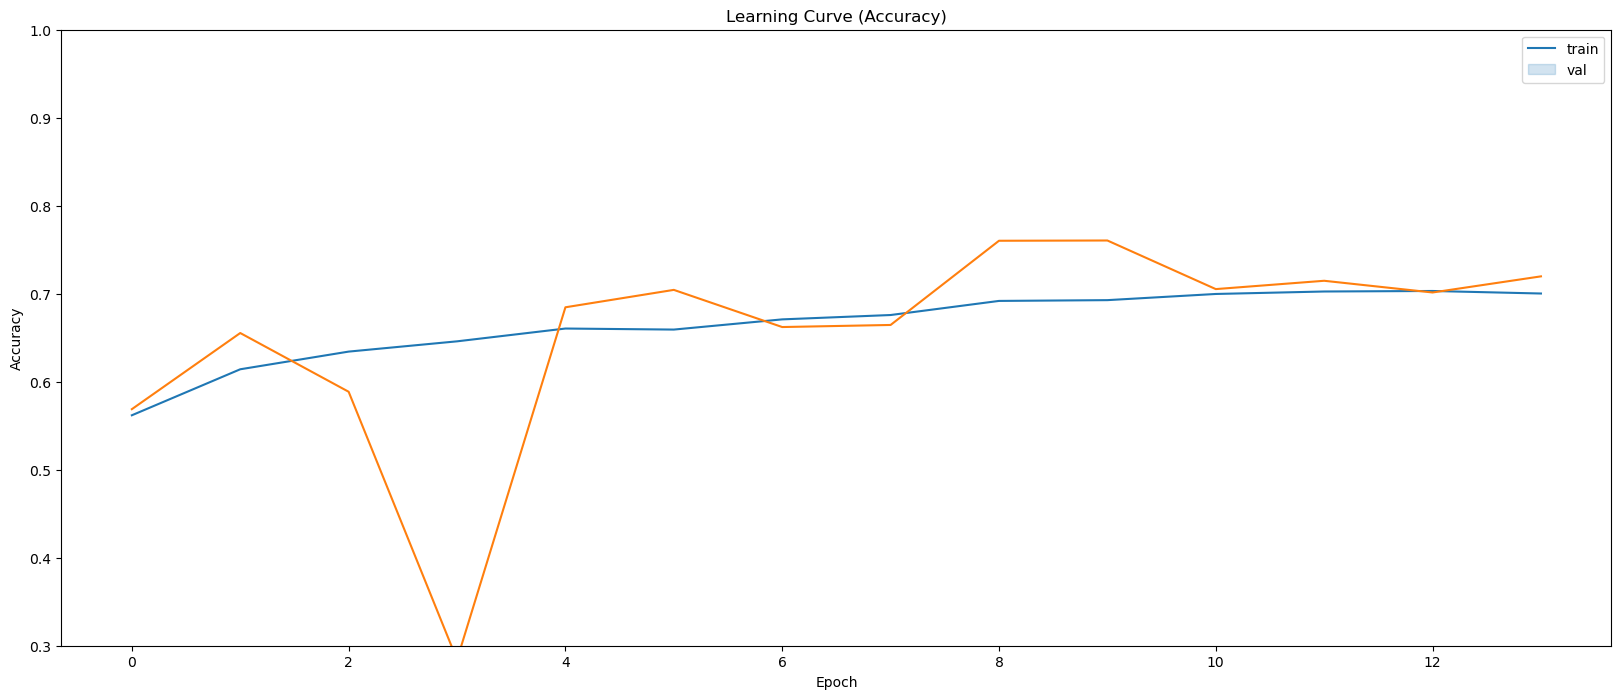

In [227]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.3, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

4235/4235 [==============================] - 35s 8ms/step


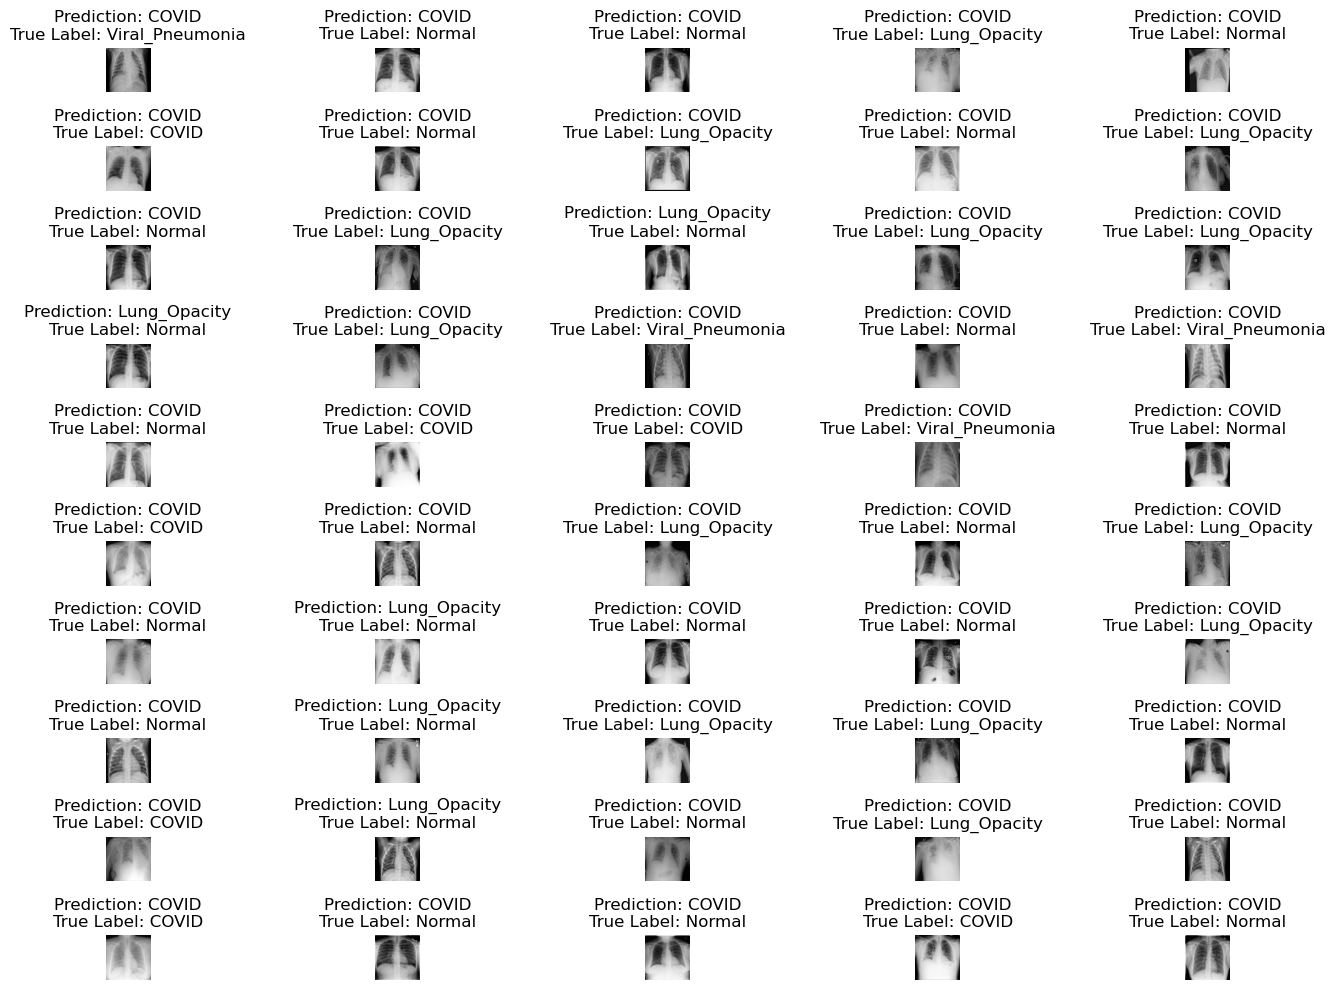

In [223]:
import cv2
# Generating predictions on the test set
y_pred = model.predict(ds_test).flatten()
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Get true labels from ds_test
true_labels = ds_test.classes

# Get class names
class_names = ds_test.class_indices
class_names = {v: k for k, v in class_names.items()}

# Visualize predictions
L = 10  # Number of rows in the grid
W = 5 # Number of columns in the grid

fig, axes = plt.subplots(L, W, figsize=(15, 10))
axes = axes.ravel()

for i in range(L * W):
    idx = np.random.randint(0, len(ds_test))
    img_path = ds_test.filepaths[idx]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB format
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    
    axes[i].imshow(img)
    axes[i].set_title(f'Prediction: {class_names[y_pred_binary[idx]]}\nTrue Label: {class_names[true_labels[idx]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [230]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])